## Sample - Superstore data set 

In [1]:
# import libererie
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ipywidgets as widgets
from IPython.display import clear_output

In [2]:
url='superstore.xls'
df = pd.read_excel(url)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2021-138688,2021-06-12,2021-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2020-108966,2020-10-11,2020-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2020-108966,2020-10-11,2020-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data preprocessing

In [3]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [4]:
#drop the postal code column for deleting all null data 
df= df.drop(columns='Postal Code')

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Region          9994 non-null   object        
 12  Product ID      9994 non-null   object        
 13  Category        9994 non-null   object        
 14  Sub-Category    9994 non-null   object        
 15  Prod

In [7]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


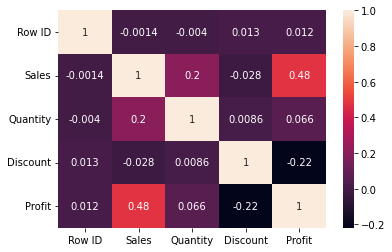

In [8]:
# check the correletion of the data 
corr=df.corr()
heat_map=sns.heatmap(corr,annot=True)

### Data Analysis

In [9]:
# all columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Ship Mode Analysis

In [10]:
# Percentage of orders for each Ship Mode
ship_modes=df.groupby(df['Ship Mode'])['Order ID'].count().sort_values(ascending=False)
ship_modes=ship_modes.to_frame()
ship_modes= ship_modes.reset_index()
ship_modes.rename(columns={'Ship Mode':'ShipMode','Order ID':'Order_ID'},inplace=True)

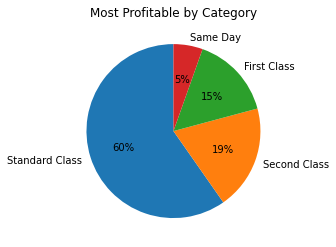

In [11]:
plt.pie(ship_modes.Order_ID, labels = ship_modes.ShipMode, startangle = 90, autopct = "%1.0f%%", explode = None)
plt.title("Most Profitable by Category")
plt.show()

<AxesSubplot:xlabel='Ship Mode'>

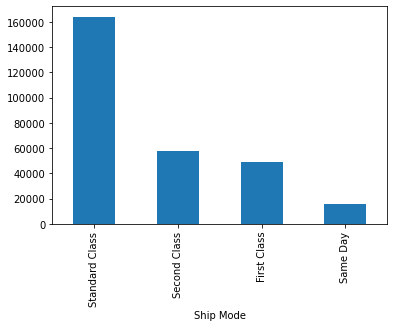

In [12]:
# which ship mode make more profit 
df.groupby(df['Ship Mode'])['Profit'].sum().sort_values(ascending=False).plot.bar()

#### Profit Analysis

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/2338937212.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  relation_pro=df.groupby(df['Order Date'].dt.year)['Profit','Discount'].sum()


<AxesSubplot:xlabel='Order Date'>

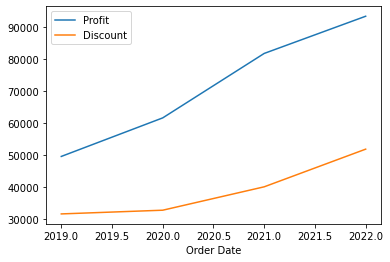

In [13]:
# The relation between profit, discount for each year
relation_pro=df.groupby(df['Order Date'].dt.year)['Profit','Discount'].sum()
relation_pro['Discount']=100*relation_pro['Discount']
relation_pro.plot()

In [14]:
# create data sets for profit analysis with date
df_data=df.groupby([df['Order Date'].dt.year.rename('year'),df['Order Date'].dt.month.rename('month')])['Sales','Profit','Discount'].sum()
df_data=df_data.reset_index()

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/1059440768.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_data=df.groupby([df['Order Date'].dt.year.rename('year'),df['Order Date'].dt.month.rename('month')])['Sales','Profit','Discount'].sum()


In [15]:
# The best month of each year based on profit
df_vis=pd.DataFrame()
years=[2019,2020,2021,2022]
for y in years:
    search_in_year=df_data['year']==y
    max_pro=df_data[search_in_year]['Profit'].max()
    df_final=df_data[search_in_year]
    find_month= df_final['Profit']==max_pro
    new=df_final[find_month]
    df_vis=df_vis.append(new, ignore_index=False, verify_integrity=False, sort=None)
    
df_vis

,year,month,Sales,Profit,Discount
10,2019,11,78628.7167,9292.1269,48.07
22,2020,11,75972.5635,12474.7884,52.59
35,2021,12,96999.0430,17885.3093,47.67
38,2022,3,58872.3528,14751.8915,31.14


<AxesSubplot:xlabel='year'>

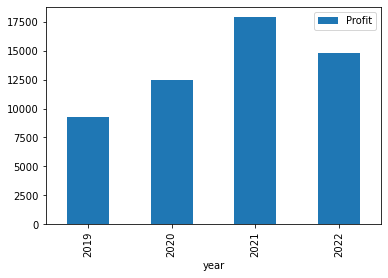

In [16]:
df_vis.plot.bar(x='year', y='Profit')

In [17]:
# Number of clients/profit in each year

df_year_customers = df.groupby(df['Order Date'].dt.year.rename('Year'))['Customer ID'].count()
df_year_customers = df_year_customers.to_frame()
df_year_customers = df_year_customers.reset_index()
df_year_customers=df_year_customers.rename(columns={'Customer ID': 'N.Customers'})


df_year_profit = df.groupby(df['Order Date'].dt.year.rename('Year'))['Profit'].sum()
df_year_profit = df_year_profit.to_frame()
df_year_profit = df_year_profit.reset_index()

df_year= pd.merge(df_year_customers, df_year_profit, how= 'inner', on = 'Year')
df_year.sort_values(by='Profit',ascending=False)

,Year,N.Customers,Profit
3,2022,3312,93439.2696
2,2021,2587,81795.1743
1,2020,2102,61618.6037
0,2019,1993,49543.9741


In [18]:
# create dataset for analyzing categories with their profits and sales
df_cat=df.groupby([df['Category'].rename('category'),df['Sub-Category'].rename('sub-category')])['Profit','Sales','Quantity','Discount'].sum()
df_cat=df_cat.reset_index()

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/3033075119.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cat=df.groupby([df['Category'].rename('category'),df['Sub-Category'].rename('sub-category')])['Profit','Sales','Quantity','Discount'].sum()


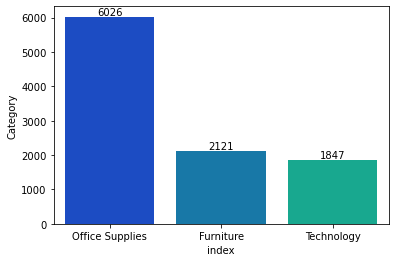

In [19]:
# Number of products in each category 

n_cat=df['Category'].value_counts()
n_cat=n_cat.to_frame()
n_cat=n_cat.reset_index()

cat_bar=sns.barplot(data = n_cat, x = n_cat.iloc[:, 0] , y = n_cat.Category ,palette = "winter")
cat_bar.bar_label(cat_bar.containers[0])
plt.show()

In [20]:
# Most profitable category
cat_pro=df_cat.groupby(df_cat['category'])['Profit'].sum()
cat_pro=cat_pro.to_frame()
cat_pro=cat_pro.reset_index()

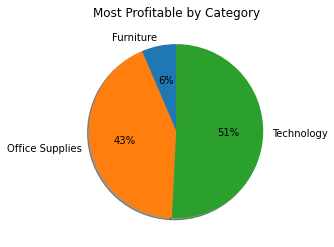

In [21]:
plt.pie(cat_pro.Profit, labels = cat_pro.category, startangle = 90, autopct = "%1.0f%%", explode = None, shadow = True)
plt.title("Most Profitable by Category")
plt.show()

In [22]:
# Create dataset to analys sub-category profit and sales 

sub_cat_pro=df_cat.groupby(df_cat['sub-category'])['Profit','Sales'].sum()
sub_cat_pro=sub_cat_pro.reset_index()
sub_cat_pro=sub_cat_pro.rename(columns={'sub-category': 'SubCategory'})
sub_cat_pro = sub_cat_pro.sort_values('Profit', ascending=False)
sub_cat_sales=sub_cat_pro.sort_values('Sales', ascending=False)

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/1585589148.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sub_cat_pro=df_cat.groupby(df_cat['sub-category'])['Profit','Sales'].sum()


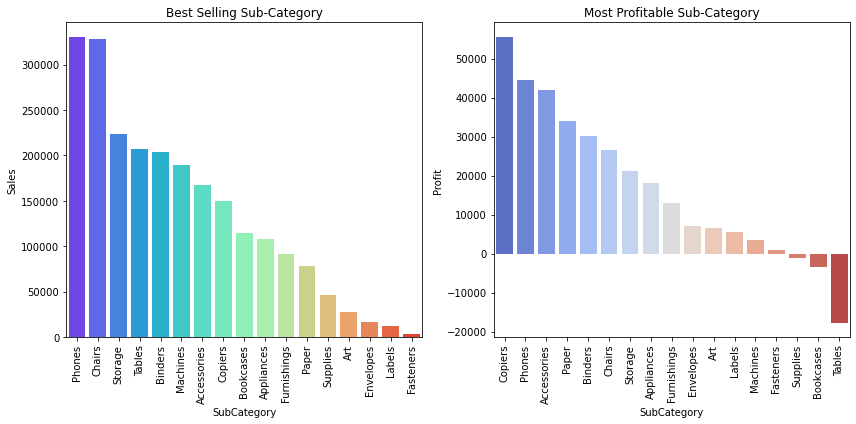

In [23]:
# plot sub-category profit and sales 
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = sub_cat_sales, x = sub_cat_sales.SubCategory, y = sub_cat_sales.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = sub_cat_pro, x = sub_cat_pro.SubCategory, y = sub_cat_pro.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

In [24]:
# Ratio between discount and minimum / maximum sub-category
# Change product if you want to sea the other products 
s=sub_cat_sales.SubCategory.unique()
dropdown = widgets.Dropdown(options =s)
button = widgets.Button(description='Selcted')
outt = widgets.Output()

def on_butt_clicked(s):
    clear_output()
    with outt:
        product= dropdown.value
        mask_tab= df['Sub-Category']== product
        df_cat_tab=df[mask_tab]
        relation_pro_table=df_cat_tab.groupby(df_cat_tab['Order Date'].dt.year)['Profit','Discount'].sum()
        relation_pro_table['Discount']= 1 * relation_pro['Discount']
        relation_pro_table.plot()

        
    
button.on_click(on_butt_clicked)
widgets.VBox([dropdown,button,outt])

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/4090169875.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  relation_pro_table=df_cat_tab.groupby(df_cat_tab['Order Date'].dt.year)['Profit','Discount'].sum()


<AxesSubplot:xlabel='Order Date'>

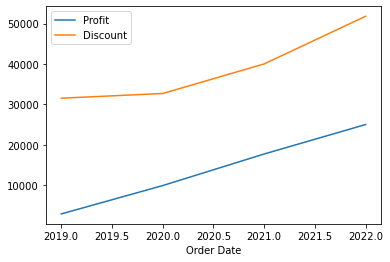

In [25]:
# Ratio between discount and minimum / maximum sub-category
# Change product if you want to sea the other products 

product='Copiers'
mask_tab= df['Sub-Category']== product
df_cat_tab=df[mask_tab]

relation_pro_table=df_cat_tab.groupby(df_cat_tab['Order Date'].dt.year)['Profit','Discount'].sum()
relation_pro_table['Discount']= 1 * relation_pro['Discount']
relation_pro_table.plot()

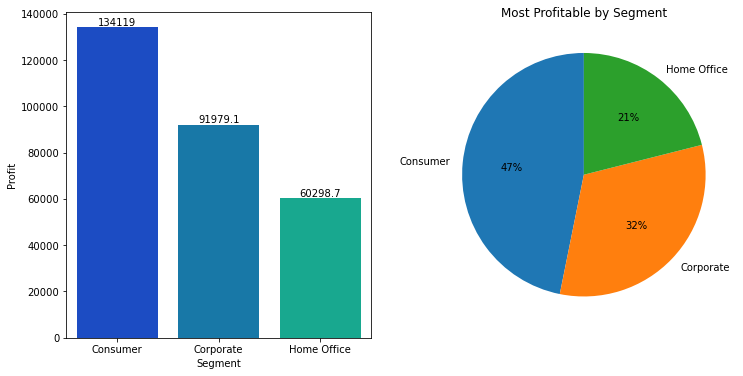

In [26]:
# Which Customer Segment is Most Profitable?
df_seg=df.groupby(df.Segment.rename('Segment'))[['Profit']].sum()
df_seg=df_seg.reset_index()

figure, axis = plt.subplots(1, 2, figsize=(12, 6))

bar=sns.barplot(data = df_seg, x = df_seg.Segment, y = df_seg.Profit, palette = "winter",ax=axis[0])
bar.bar_label(bar.containers[0])

plt.pie(df_seg.Profit, labels = df_seg.Segment, startangle = 90, autopct = "%1.0f%%")
plt.title("Most Profitable by Segment")

plt.show()

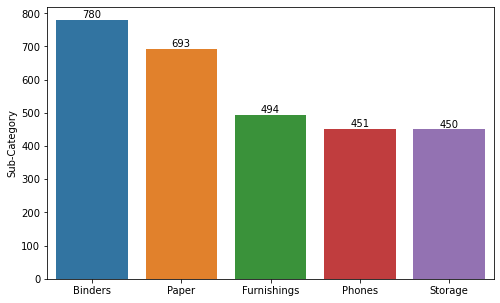

In [27]:
# Order number for each sub-category based on segment
# Change segtype to sea the others segment type

segtype='Consumer'

def seg_product(segtype):
    mask=df.Segment==segtype
    df_seg_product=df[mask]['Sub-Category']
    df_seg_product = df_seg_product.value_counts()[:5]
    df_seg_product=df_seg_product.to_frame()
    
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x=np.arange(len(df_seg_product)), y=df_seg_product['Sub-Category'])
    ax.bar_label(ax.containers[0])
    ax.set_xticklabels(df_seg_product.index)
    plt.show()


seg_product(segtype)

In [28]:
# Best/Worset Customers 

df_customers=df.groupby(df['Customer ID'].rename('Customer'))['Profit'].sum().sort_values(ascending=False)
df_customers = df_customers.to_frame()
df_customers= df_customers.reset_index()
df_best_customers = df_customers[:10]
df_worset_customers = df_customers[-10:]

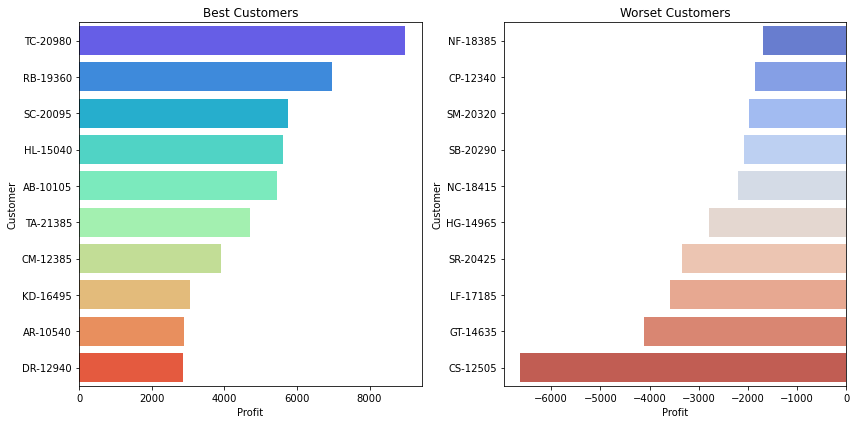

In [30]:
# Best/Worset Customers plot

figure, axis = plt.subplots(1,2, figsize=(12, 6))

Best_customers = sns.barplot(data = df_best_customers, y = df_best_customers.Customer, x = df_best_customers.Profit, palette = "rainbow", ax = axis[0])
Best_customers.set(title='Best Customers')
Best_customers.set_yticklabels(Best_customers.get_yticklabels(),size = 10)

Worset_customers = sns.barplot(data = df_worset_customers, y = df_worset_customers.Customer, x = df_worset_customers.Profit, palette = "coolwarm", ax=axis[1])
Worset_customers.set(title='Worset Customers')
Worset_customers.set_yticklabels(Worset_customers.get_yticklabels(),size = 10)

figure.tight_layout()
plt.show()

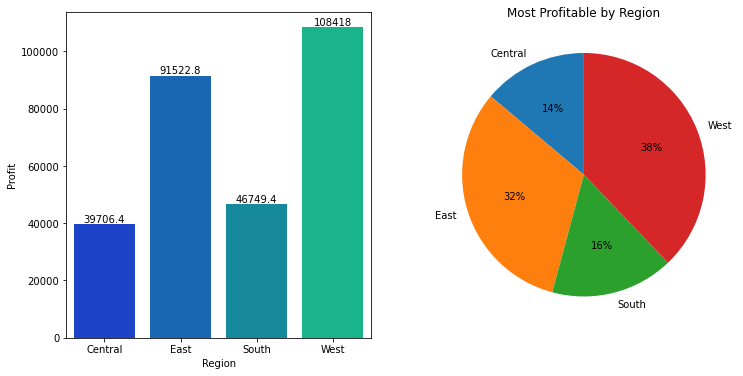

In [31]:
# Which Region is the Most Profitable?
df_reg_profit = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())

figure, axis = plt.subplots(1, 2, figsize=(12, 6))

bar_2=sns.barplot(data = df_reg_profit, x = df_reg_profit.Region, y = df_reg_profit.Profit, palette = "winter",ax=axis[0])
bar_2.bar_label(bar_2.containers[0])

plt.pie(df_reg_profit.Profit, labels = df_reg_profit.Region, startangle = 90, autopct = "%1.0f%%")
plt.title("Most Profitable by Region")


plt.show()

In [32]:
# Which City is the Most/Lowest Profitable
df_city_profit = pd.DataFrame(df.groupby(['City'])['Profit', 'Sales'].sum().sort_values('Profit',ascending = False))

top10 = df_city_profit[:10].reset_index()
bottom10 = df_city_profit[-10:].reset_index()

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/745971536.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_city_profit = pd.DataFrame(df.groupby(['City'])['Profit', 'Sales'].sum().sort_values('Profit',ascending = False))


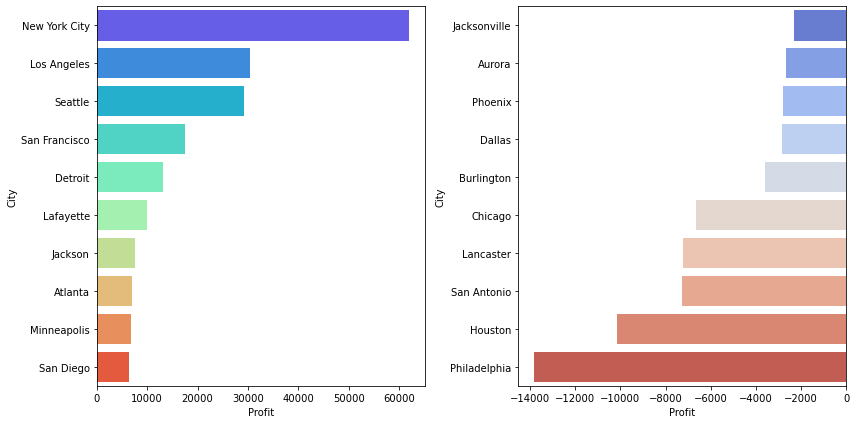

In [33]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))

top10c = sns.barplot(data = top10, y = top10.City, x = top10.Profit, palette = "rainbow", ax = axis[0])
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

bottom10c = sns.barplot(data = bottom10, y = bottom10.City, x = bottom10.Profit, palette = "coolwarm", ax=axis[1])
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

figure.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp/ipykernel_15156/2138844090.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_city_product=d[mask][['Sub','Sales']][:5]


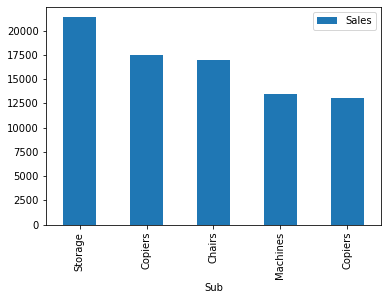

In [34]:
# Best sub category sales for each city 
# Change city to sea the others cities 

city='New York City'

d=df.groupby([df['City'],df['Sub-Category']])['Sales'].sum()
d=d.to_frame()
d=d.reset_index()
d=d.sort_values('Sales',ascending = False)
d=d.rename(columns={'Sub-Category':'Sub'})
def city_product(city):
    mask=df.City==city
    df_city_product=d[mask][['Sub','Sales']][:5]
    df_city_product.plot.bar(x='Sub',y='Sales')
    plt.show()
    

city_product(city)

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of orders for each discount'}, xlabel='Discount', ylabel='count'>

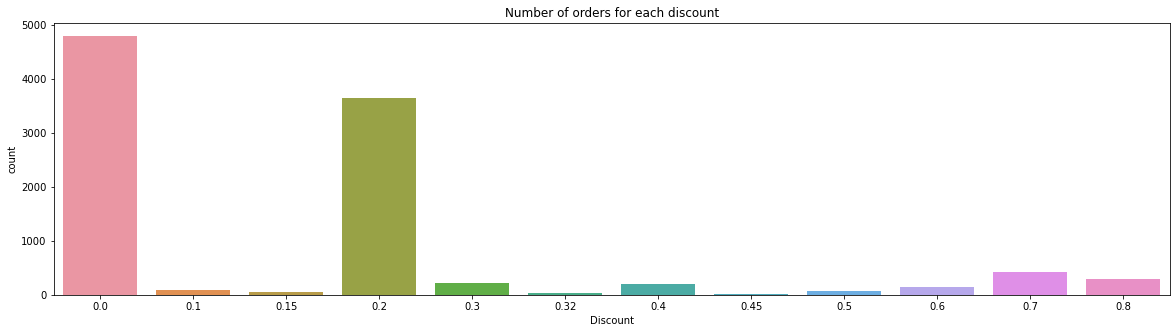

In [35]:
# Visualization: Number of orders for each discount

plt.figure(figsize=(20,5))
plt.title("Number of orders for each discount")
sns.countplot(df['Discount'],label="Count")